In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import rainbow
from sklearn import metrics
import xgboost as xgb

from sklearn.linear_model import LogisticRegression

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


Dataset


In [ ]:
# Loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('/content/heart.csv')

Data Preprocessing

In [ ]:


# seperating the data and label into X and Y respectively
X=df.iloc[:,0:13]
Y=df['target']


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y,random_state=2)


Visual Dataset

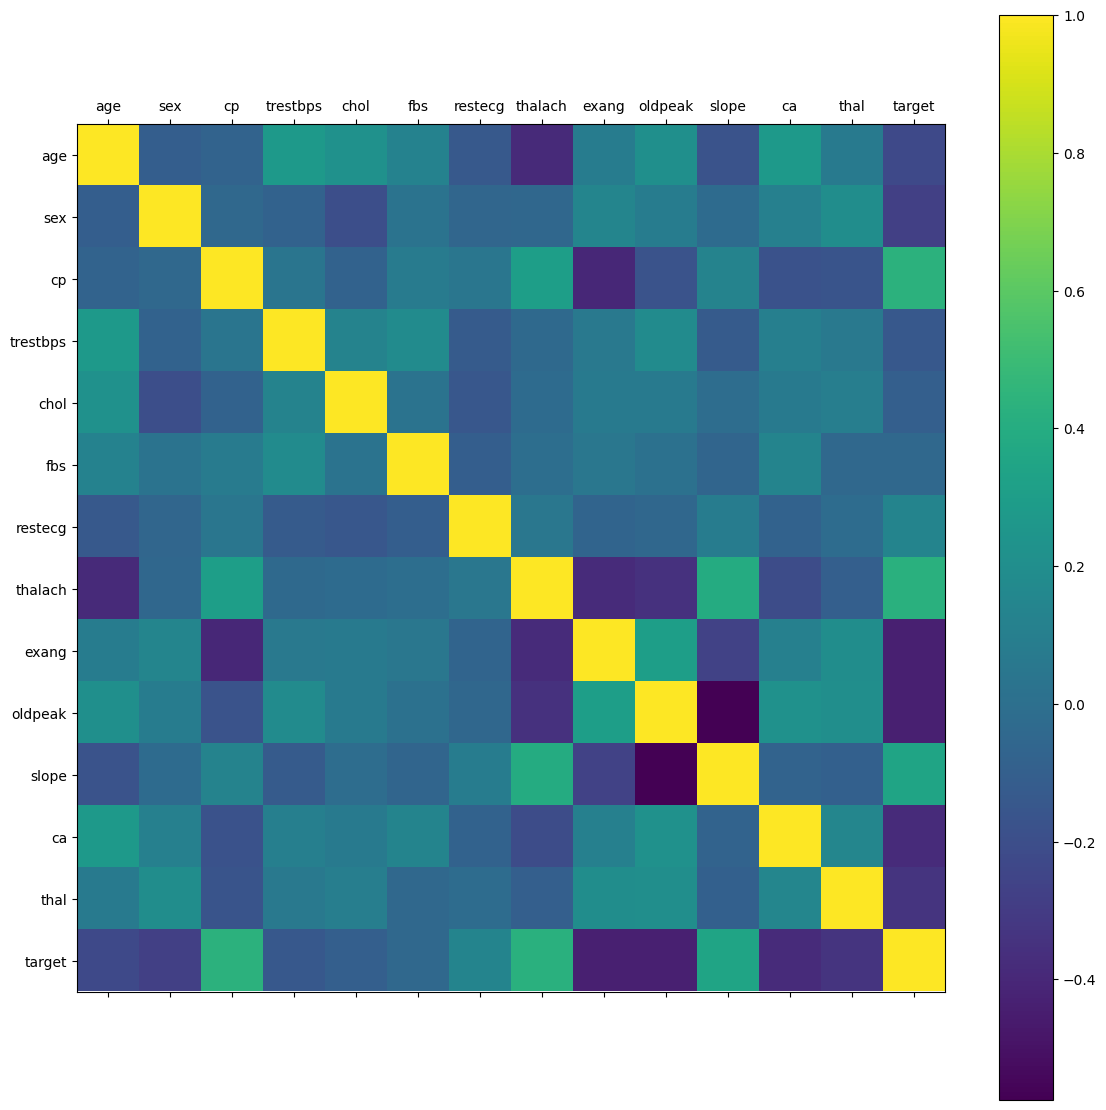

In [ ]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

Confusion Matrix


Support Vector Classifier

Accuracy of the SVM model: 0.824390243902439


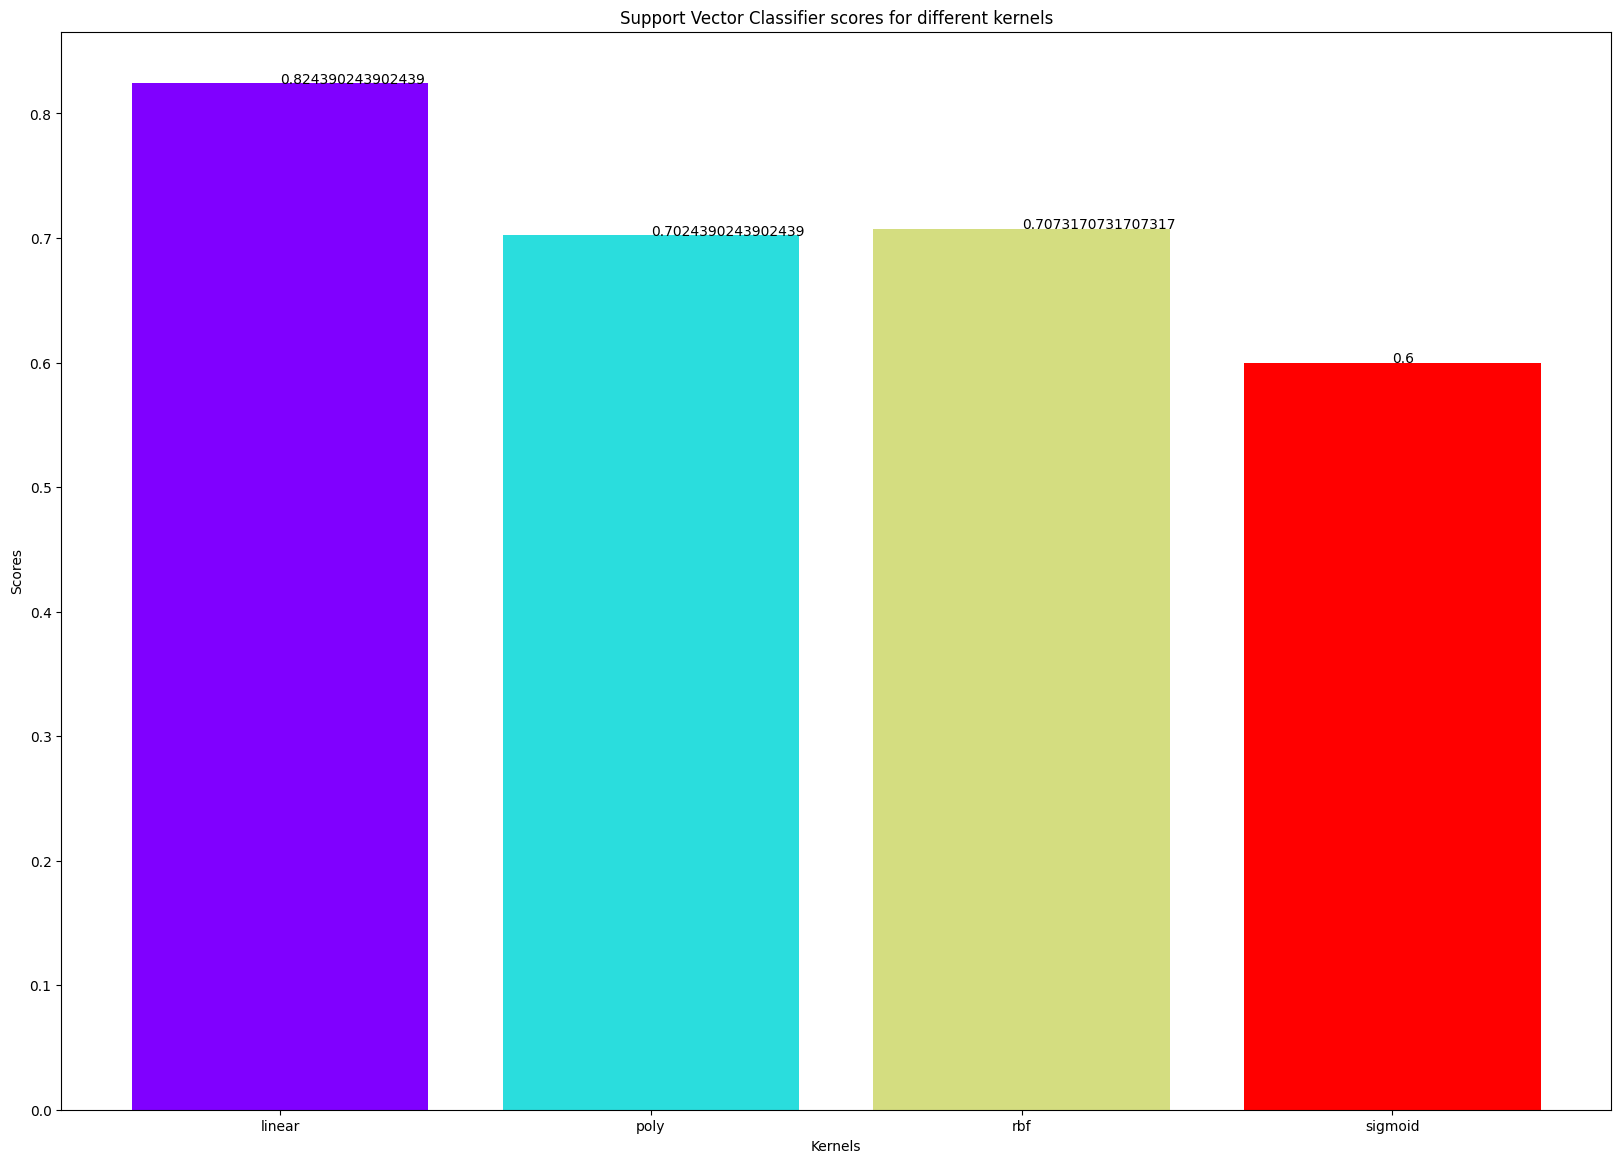

In [ ]:
svm_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svm_classifier = svm.SVC(kernel = kernels[i], probability=True, random_state=2)
    svm_classifier.fit(X_train, Y_train)
    svm_scores.append(svm_classifier.score(X_test, Y_test))

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svm_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svm_scores[i], svm_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

svm_classifier = svm.SVC(kernel='linear', probability=True, random_state=2)
svm_classifier.fit(X_train, Y_train)


svm_classifier.fit(X_train, Y_train)
# Predict on the test data
Y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the SVM model: {accuracy}")

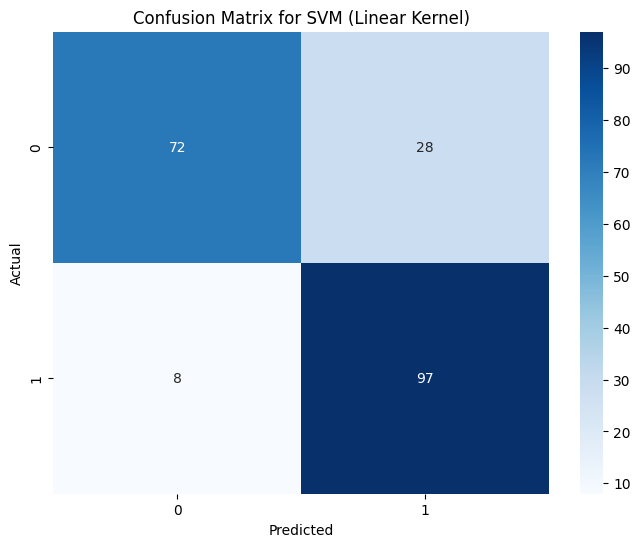

In [ ]:
confusion = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM (Linear Kernel)")
plt.show()

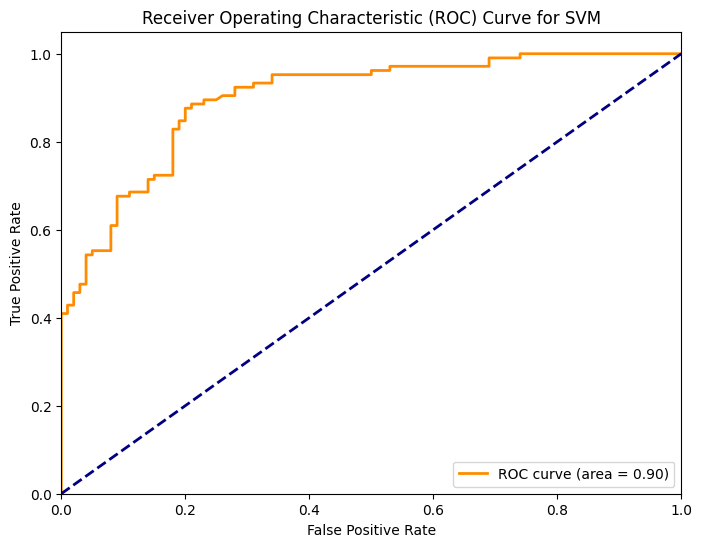

In [ ]:

# Predict the probabilities on the test data
Y_prob = svm_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc='lower right')
plt.show()


Decision Tree Classifier

Accuracy of the Decision Tree model: 1.0


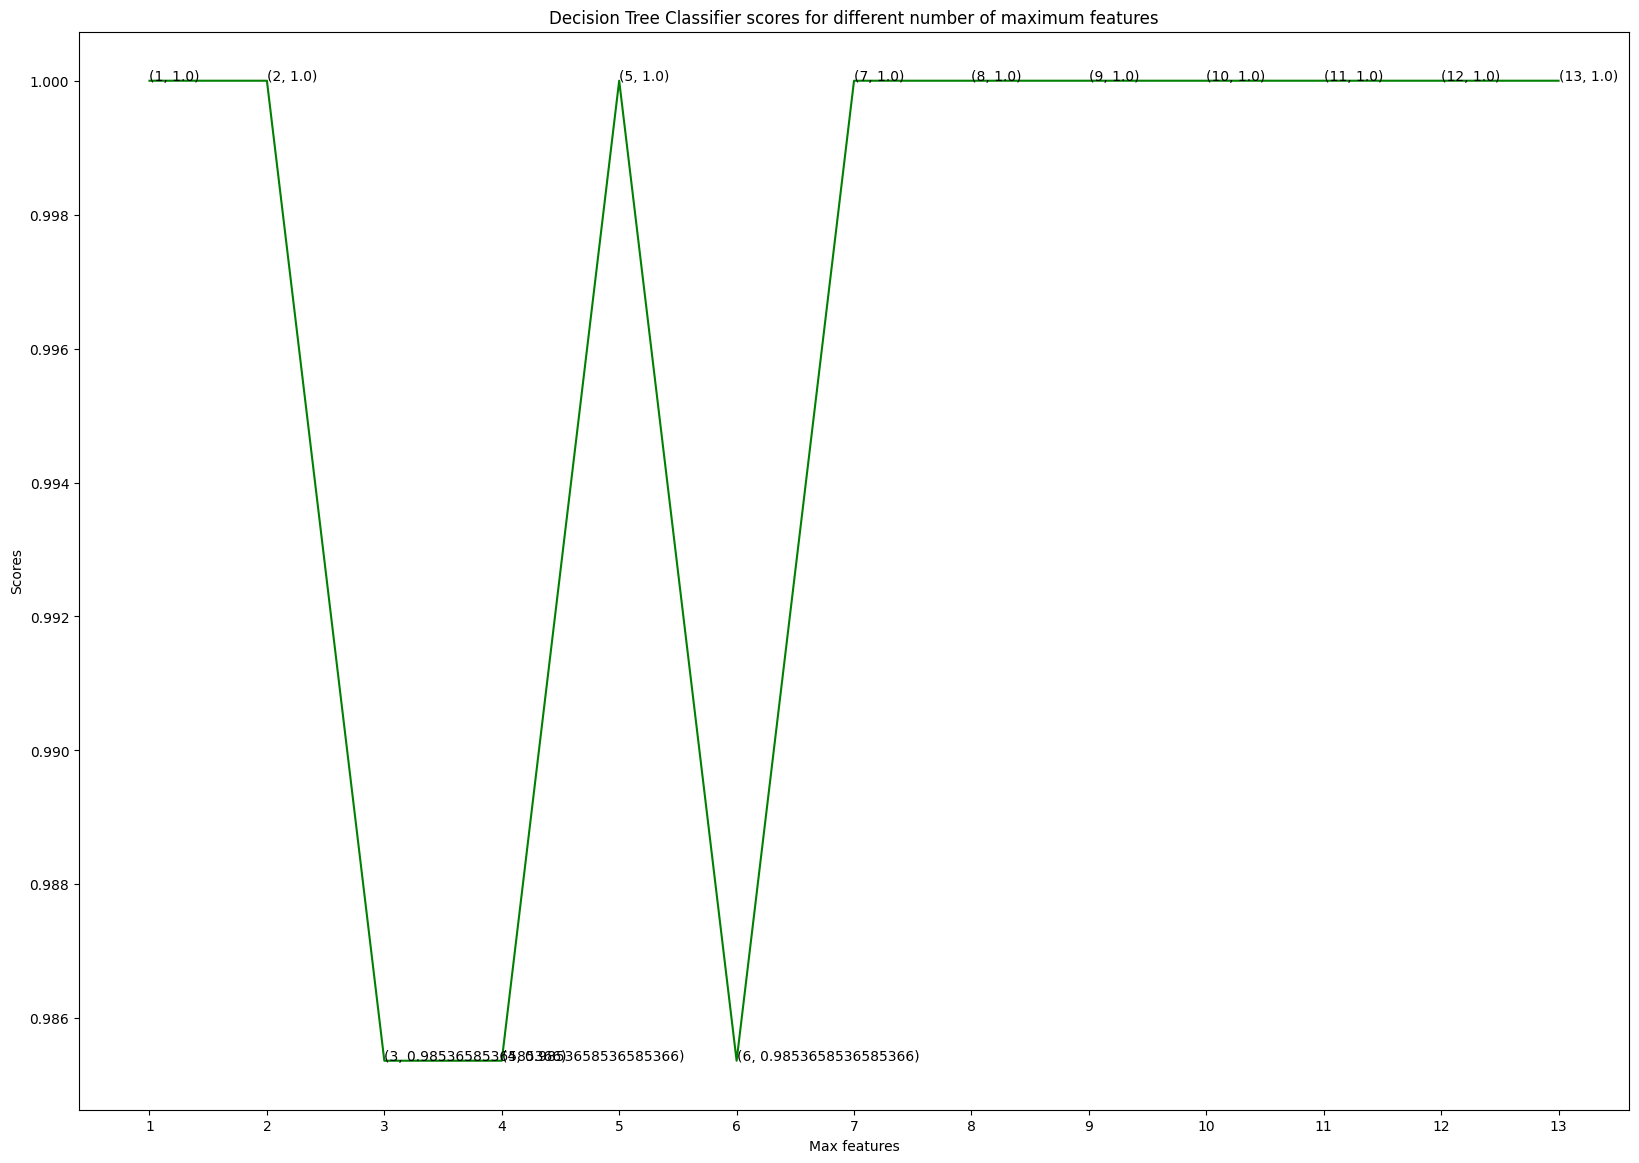

In [ ]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 2)
    dt_classifier.fit(X_train, Y_train)
    dt_scores.append(dt_classifier.score(X_test, Y_test))

plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

# Training the Decision Tree classifier

dt_classifier = DecisionTreeClassifier(random_state = 2)
dt_classifier.fit(X_train, Y_train)

# Predict on the test data
Y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy}")

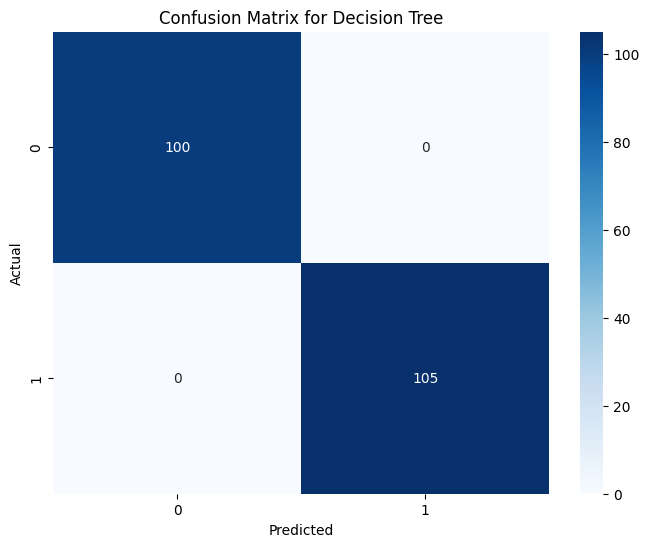

In [ ]:
confusion = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

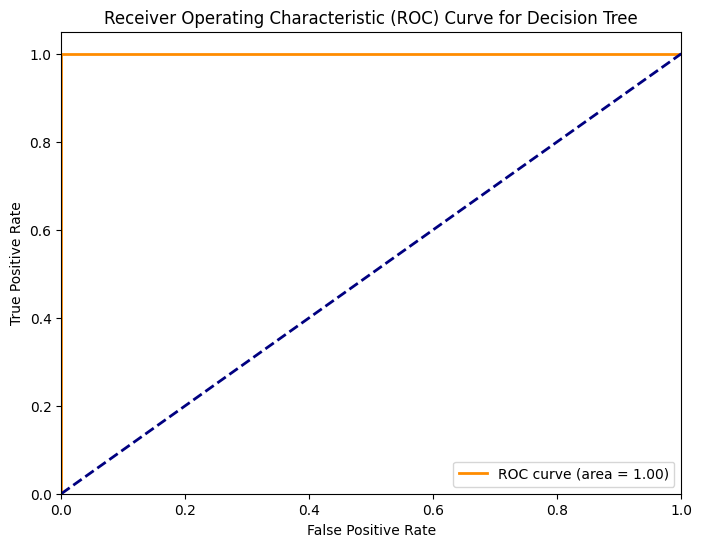

In [ ]:

# Building the model using a Decision Tree classifier
# decision_tree = DecisionTreeClassifier(random_state=2)

# Predict the probabilities on the test data
Y_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Corrected line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()




Random Forest Classifier

Accuracy of the Random Forest model: 1.0


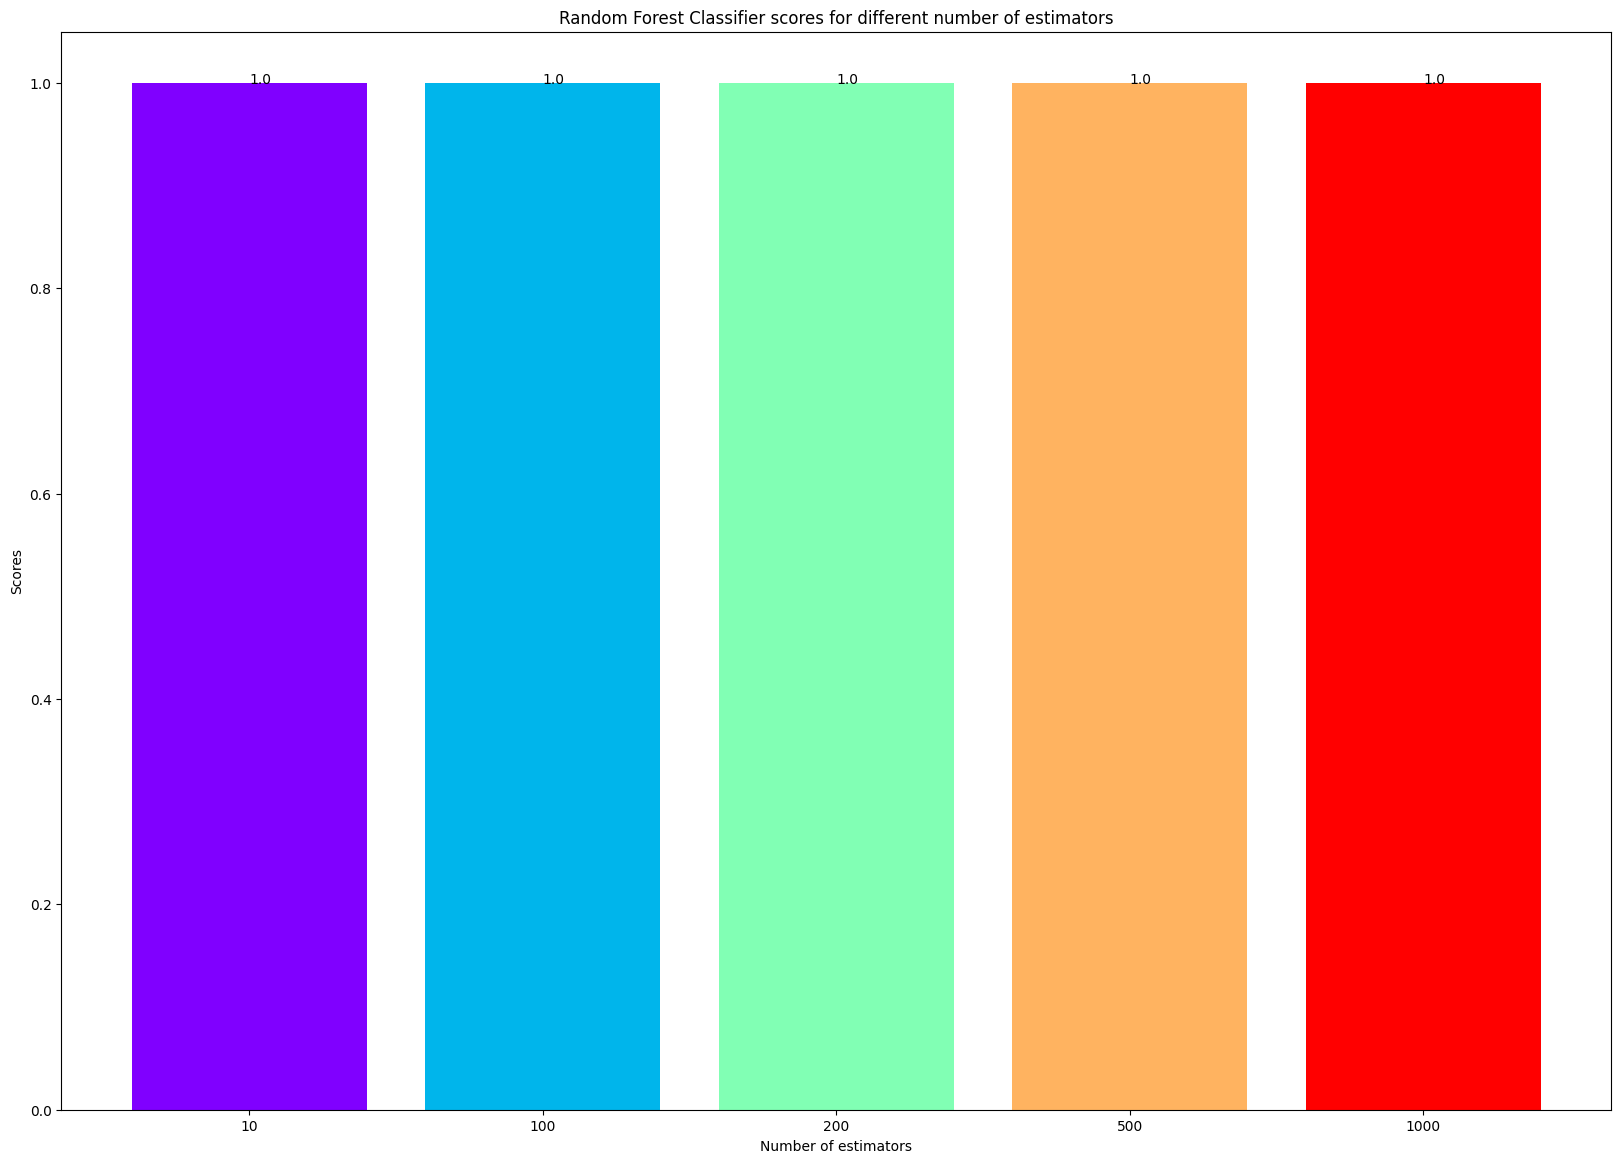

In [ ]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 2)
    rf_classifier.fit(X_train, Y_train)
    rf_scores.append(rf_classifier.score(X_test, Y_test))

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
rf_classifier.fit(X_train, Y_train)

Y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

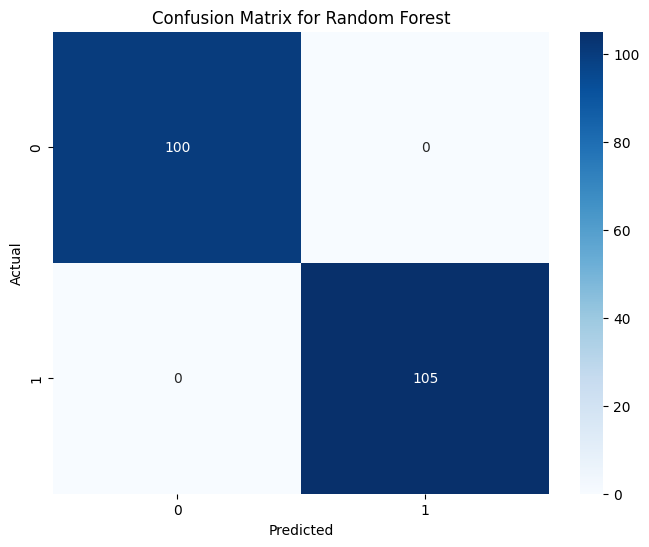

In [ ]:
confusion = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

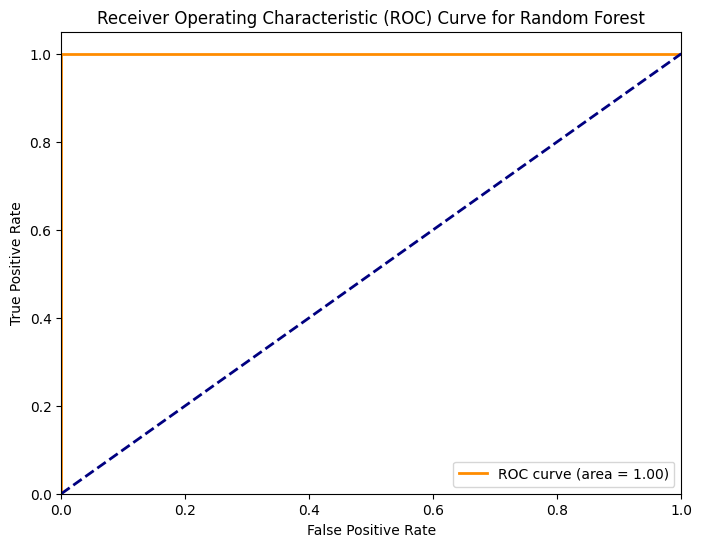

In [ ]:

# Building the model using a Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=2)

# Training the Random Forest classifier

# Predict the probabilities on the test data
Y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of the Logistic Regression model: 0.8


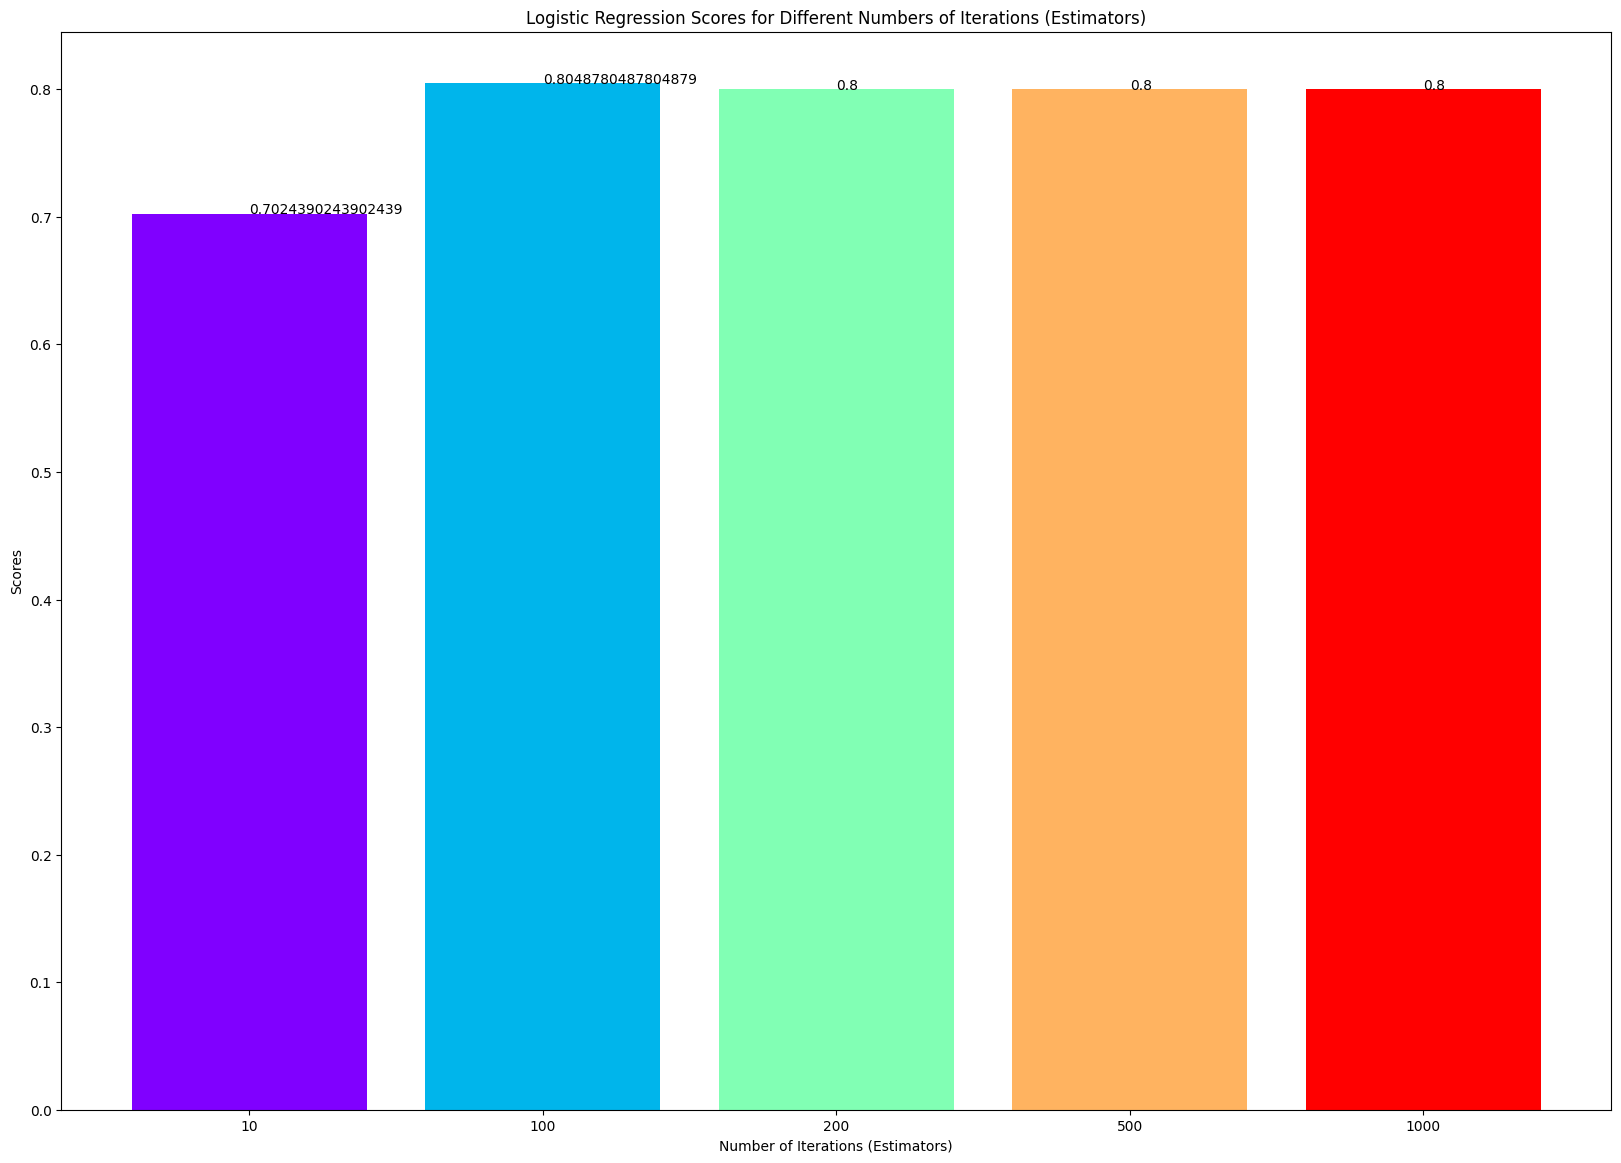

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.cm import rainbow

log_scores = []
estimators = [10, 100, 200, 500, 1000]

for i in estimators:
    log_classifier = LogisticRegression(max_iter=i, random_state=2)  # Use max_iter to specify the number of iterations
    log_classifier.fit(X_train, Y_train)
    log_scores.append(log_classifier.score(X_test, Y_test))

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], log_scores, color=colors, width=0.8)

for i in range(len(estimators)):
    plt.text(i, log_scores[i], log_scores[i])


# log_classifier = LogisticRegression(random_state=2)
# Predict on the test data
Y_pred = log_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")


plt.xticks(ticks=[i for i in range(len(estimators))], labels=[str(estimator) for estimator in estimators])
plt.xlabel('Number of Iterations (Estimators)')
plt.ylabel('Scores')
plt.title('Logistic Regression Scores for Different Numbers of Iterations (Estimators)')
plt.show()




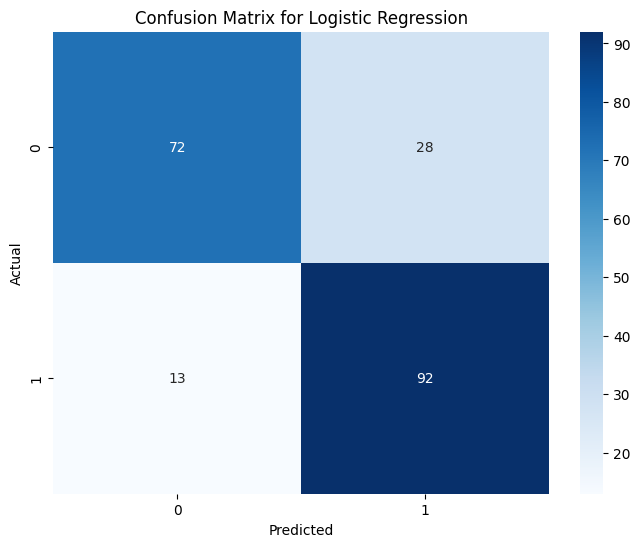

In [ ]:
confusion = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

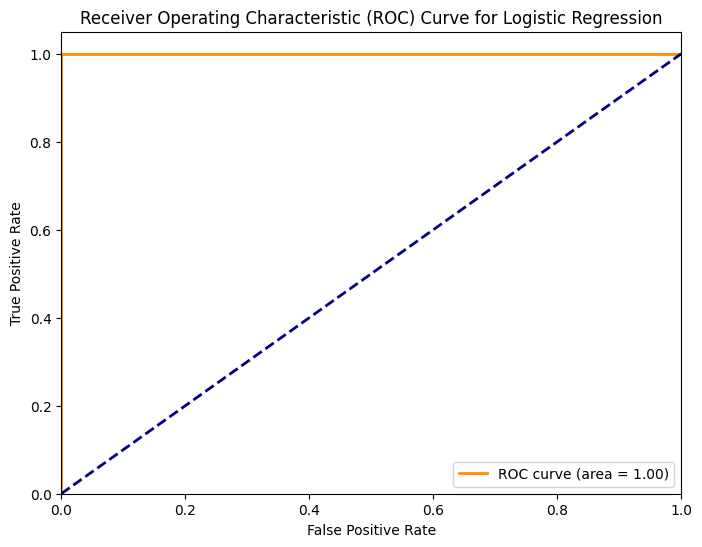

In [ ]:

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()



Random Forest Classifier has highest accuracy which is 94%
